# Plot model patterns for a schematic

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from mindstorm import dsmplot
from cymr import cmr

res_dir = Path(os.environ['CFR_RESULTS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'schematic'

In [2]:
patterns = cmr.load_patterns(res_dir / 'cfr_patterns.hdf5')

In [3]:
items = [
    'Mount Fuji', 
    'Oprah Winfrey', 
    'cup', 
    'Jennifer Aniston', 
    'Mount Everest', 
    'backpack', 
    'Eiffel Tower',
    'White House',
    'Wall Street',
    'birdhouse',
    'speaker',
    'orange',
    'Mike Myers',
    'Abraham Lincoln',
]
categories = [1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0]
ind = [np.where(patterns['items'] == i.upper())[0][0] for i in items]

In [4]:
n = len(items)
m = 9
ica = FastICA(n_components=m, random_state=42)
raw_vectors = patterns['vector']['use'][ind, :]
vectors = np.clip(stats.zscore(ica.fit_transform(raw_vectors), axis=0), -1, 1)

In [5]:
def update(c, c_in, B):
    cdot = np.dot(c, c_in)
    rho = np.sqrt(1 + B ** 2 * (cdot ** 2 - 1)) - (B * cdot)
    c_new = rho * c + B * c_in
    return c_new

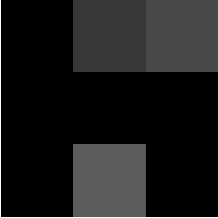

In [6]:
B = 0.8
c = np.zeros(9)
c[4] = 1
for item, v in zip(items, vectors):
    c_in = v
    c = update(c, c_in, B)
    h = dsmplot.plot_pattern(c.reshape(3, 3))
    h.set_clim(0, 1)
    plt.savefig(fig_dir / f'use_{item}.png')

In [7]:
rng = np.random.default_rng(42)

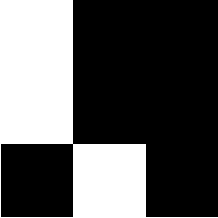

In [8]:
B = 1
c = np.zeros(9)
c[4] = 1
indices = np.arange(9)
rng.shuffle(indices)
for item, c in zip(items, categories):
    pattern = np.zeros(9)
    pattern[indices[c * 3:(c + 1) * 3]] = 1
    c = update(c, pattern, B)
    h = dsmplot.plot_pattern(c.reshape(3, 3))
    h.set_clim(0, 1)
    plt.savefig(fig_dir / f'cat_{item}.png')

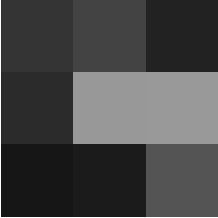

In [9]:
B = 0.6
c = np.zeros(9)
c[4] = 1
indices = np.arange(9)
rng.shuffle(indices)
n = 9
for i, item in enumerate(items[:n]):
    pattern = np.zeros(n)
    pattern[indices[i]] = 1
    c = update(c, pattern, B)
    h = dsmplot.plot_pattern(c.reshape(3, 3))
    h.set_clim(0, 1)
    plt.savefig(fig_dir / f'item_{item}.png')

In [10]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

mindstorm : 0.9.0
cymr      : 0.11.2
scipy     : 1.7.1
matplotlib: 3.5.2
numpy     : 1.21.4

